# Objetivo del laboratorio

El objetivo de la presenta práctica es conocer el estándar de simulación de circuitos [SPICE](http://bwrcs.eecs.berkeley.edu/Classes/IcBook/SPICE) y realizar pequeñas simulaciones en corriente continua con el mismo. SPICE es una forma elegante y sencilla de codificar circuitos eléctricos de manera que puedan ser procesados por un ordenador. Mediante un sencillo lenguaje podemos definir resistencias, fuentes de alimentación, etc., las conexiones entre ellos y los resultados que deseamos obtener.

# El estándar SPICE

**SPICE** es una abreviabiación de *Simulation Program with Integrated Circtuit Emphasis*.
Se trata básicamente de un método estándar para describir circuitos usando texto plano en lugar de una representación gráfica (o *esquemática*).
A esta descripción en texto se la llama también **netlist** y básicamente se corresponde con la *lista* de los componentes del circuito y cómo estos están conectados entre sí, es decir, de los nodos de unión.
Los ficheros netlist pueden tener extensiones `.cir`, `.net`, `.ckt`, ó `.sp` y es muy común encontrárselos con cualquiera de estas.

Existen en el mercado muchas variantes (intérpretes) de Spice, aunque el original fue descrito en la Universidad de Berkeley. En la lista de intérpretes de Spice tenemos desde esfuerzos y proyectos comerciales hasta *open source* y regidos por distintas comunidades de usuarios y programadores.


> **Pregunta:** Enumera todos los intérprete de Spice que puedas encontrar. Crea una tabla en Markdown con varias columnas (para el nombre, fabricante, versión actual, licencia y alguna característica sobresaliente). Aquí tienes un ejemplo del que puedes partir y seguir completando:

| Intérprete  | Licencia                         | Fabricante                                                             | Características                                                                                                         | URL                                                       |
|:------------|:---------------------------------|:-----------------------------------------------------------------------|:------------------------------------------------------------------------------------------------------------------------|:----------------------------------------------------------|
| Ahkab       | GPL                              | Giuseppe Venturini                                                     | Basado en Python                                                                                                        | https://ahkab.readthedocs.io/en/latest/                   |
| SPICE OPUS  | Free                             | EDA Group, Faculty of Electrical Engineering, University of Ljubljana. | Basado en UC Berkeley's SPICE 3f4 y Georgia Tech Research Institute's XSPICE                                            | http://www.spiceopus.si/                                  |
| TINA-TI     | Free                             | DesignSoft exclusively for Texas Instruments.                          | TINA tiene una amplia capacidad de post-procesamiento que te permite formatear los resultados de la manera que quieras. | https://www.ti.com/tool/TINA-TI                           |
| Smart Spice | Contactar con oficina de ventas. | SILVACO                                                                | Completo entorno de diseño de circuitos de RF, señal mixta y analógico.                                                 | https://www.silvaco.com/products/analog_mixed_signal.html |
| PySpice     | GPLv3.                           | Fabrice Salvaire                                                       | Módulo de Python que interconecta Python con los simuladores de circuito Ngspice y Xyce.                                | https://pyspice.fabrice-salvaire.fr/                      |

 > **Pregunta:** ¿Qué comparación puedes efectuar entre C y Spice como estándares (lenguajes) y sus respectivas implementaciones en software? ¿Qué implementaciones reales (compiladores) del lenguaje C conoces? 

Las implementaciones del lenguaje C que conozco se pueden dividir en tres grupos, las que se necesitan instalar en el sistema, la portable que depende de unos pocos ficheros del sistema, y las herramientas online.

##### Para instalar

El más famoso compilador de C es el GNU Compiler Collection (colección de compiladores GNU) es un conjunto de compiladores creados por el proyecto GNU. GCC es software libre y lo distribuye la Free Software Foundation (FSF) bajo la licencia general pública GPL.

Tiene variantes para windows como MinGW (Minimalist GNU for Windows), anteriormente conocido como MinGW32, es una implementación de los compiladores GCC para la plataforma Win32, que permite migrar la capacidad de este compilador en entornos Windows. Es un fork de Cygwin en su versión 1.3.3. Además MinGW incluye un conjunto de la API de Win32, permitiendo un desarrollo de aplicaciones nativas para esa plataforma, pudiendo generar ejecutables y bibliotecas usando la API de Windows.

##### Herramienta portable

En la sección portable nos encontramos con El Portable C Compiler o Compilador de C Portable (también conocido como pcc o, algunas veces, como pccm - máquina de compilador de C portable) fue uno de los primeros compiladores para el lenguaje de programación C escrito por Stephen C. Johnson de los Laboratorios Bell a mediados de los 70, basado, en parte, en las ideas de un trabajo previo de Alan Snyder en 1973.

##### Compiladores Online

Por último, existe un grupo de compiladores donde el cliente no tiene que instalar nada, los compiladores online.

* [Rextester](https://rextester.com/l/c_online_compiler_gcc)
* [OnlineGDB](https://www.onlinegdb.com/online_c_compiler)
* [Paiza](https://paiza.io/es/languages/online-c-compiler)

## Elementos de un netlist
 
Como acabamos de comentar, un netlist se corresponde con la codificación de los elementos electrónicos de un circuito y las uniones entre los mismos. Veamos con más concreción qué partes y secciones lo componen.

## Comentarios

La primera línea de un netlist se corresponderá siempre con un comentario. A partir de esta línea se pueden introducir más comentarios pero tienen que ir siempre precedidos de un `*`. Ejemplo:

```spice
Mi primer circuito
* Otro comentario
* más comentarios
*
```

## Dispositivos básicos de un circuito
Los elementos de un netlist son los mismos que encontramos en cualquier circuito eléctrico sencillo, tales como resistencias, **condensadores**, **bobinas**, **interruptores**, **hilos** y **fuentes** de alimentación.

Para distinguir uno de otro, se reserva una letra característica: `V` para fuentes de alimentación, `R` para resistencias, `C` para condensadores y `L` para bobinas. También es posible usar estas letras en su versión en minúscula (`r`, `v`, `c`, `l`, etc.).

Después de esta letra característica se puede sufijar cualquier texto para diferenciar un elemento de otro (números, letras, palabras, etc.). Ejemplo:

```
* Una resistencia
R1
*  Otra resistencia
R2
* Fuente de alimentación
V
* Un condensador
Cprincipal
```

## Conexiones

A continuación de indicar el elemento eléctrico, tenemos que informar a Spice cuáles son los puntos de unión tanto a un lado como al otro del elemento.

Así es como Spice sabe qué está conectado a qué: porque comparten un **punto** (o **nodo**, aunque este término se reserva sobretodo a uniones de más de dos elementos) que hemos señalizado correctamente. Para nombrar nodos, lo mejor es emplear una
numeración secuencial: 0...n. **La enumeración de los puntos de unión es completamente a nuestro criterio**.

```
* Una resistencia
* entre cables 0 y 1
R1 0 1
```

**Sólo es necesario seguir un criterio**: en el caso de una fuente de alimentación, el nodo que pondremos primero será aquel que está más cerca del *borne* positivo. Ejemplo:

```spice
* Para una fuente indicamos primeramente conexión a nodo positivo.
v 2 3 type=vdc vdc=1
```

En el *caso de LTspice* no es necesario indicar los parámetros `type=vdc` y `vdc=X`, sino que si no se especifica nada, se supone que el último valor es el del voltaje a corriente continua:

```spice
* Especificación de una fuente de alimentación de 10 V en corrient continua en el caso de LTspice
v 0 1 10
```

Aquí tienes un ejemplo gráfico de los componentes comentados justo arriba (resistencia y voltaje):

![Resistencia y voltaje SPICE](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencia%20y%20pila%20con%20nodos.svg?sanitize=true)

## Unidades en SPICE

Las unidades de las magnitudes características del circuito son siempre [unidades del Sistema Internacional](https://en.wikipedia.org/wiki/SI_electromagnetism_units) y no es necesario indicarlo explícitamente en el netlist.

La forma de especificar múltiplos de estas cantidades es añadiendo una letra.
Básicamente las que nos interesan y las que suelen aparecer mayoritariamente son `k` para "kilo-," `m` para "mili-" y `u` para "micro-".

> **Pregunta:** Crea una tabla en Markdown con todos los prefijos de múltiplos que puedas, su abreviatura y su equivalencia numérica.

| 1000<sup>n</sup>    | 10<sup>n</sup>     | Prefijo | Símbolo | Equivalencia  decimal en los  prefijos del Sistema Internacional |
|:--------------------|:-------------------|:--------|:--------|:-----------------------------------------------------------------|
| 1000<sup>8</sup>    | 1000<sup>24</sup>  | yotta   | Y       | 1 000 000 000 000 000 000 000 000                                |
| 1000<sup>7</sup>    | 1000<sup>21</sup>  | zetta   | Z       | 1 000 000 000 000 000 000 000                                    |
| 1000<sup>6</sup>    | 1000<sup>18</sup>  | exa     | E       | 1 000 000 000 000 000 000                                        |
| 1000<sup>5</sup>    | 1000<sup>15</sup>  | peta    | P       | 1 000 000 000 000 000                                            |
| 1000<sup>4</sup>    | 1000<sup>12</sup>  | tera    | T       | 1 000 000 000 000                                                |
| 1000<sup>3</sup>    | 1000<sup>9</sup>   | giga    | G       | 1 000 000 000                                                    |
| 1000<sup>2</sup>    | 1000<sup>6</sup>   | mega    | M       | 1 000 000                                                        |
| 1000<sup>1</sup>    | 1000<sup>3</sup>   | kilo    | k       | 1 000                                                            |
| 1000<sup>2/3</sup>  | 1000<sup>2</sup>   | hecto   | h       | 100                                                              |
| 1000<sup>1/3</sup>  | 1000<sup>1</sup>   | deca    | da      | 10                                                               |
| 1000<sup>0</sup>    | 1000<sup>0</sup>   |         |         | 1                                                                |
| 1000<sup>-1/3</sup> | 1000<sup>-1</sup>  | deci    | d       | 0.1                                                              |
| 1000<sup>-2/3</sup> | 1000<sup>-2</sup>  | centi   | c       | 0.01                                                             |
| 1000<sup>-1</sup>   | 1000<sup>-3</sup>  | mili    | m       | 0.001                                                            |
| 1000<sup>-2</sup>   | 1000<sup>-6</sup>  | micro   | µ       | 0.000 001                                                        |
| 1000<sup>-3</sup>   | 1000<sup>-9</sup>  | nano    | n       | 0.000 000 001                                                    |
| 1000<sup>-4</sup>   | 1000<sup>-12</sup> | pico    | p       | 0.000 000 000 001                                                |
| 1000<sup>-5</sup>   | 1000<sup>-15</sup> | femto   | f       | 0.000 000 000 000 001                                            |
| 1000<sup>-6</sup>   | 1000<sup>-18</sup> | atto    | a       | 0.000 000 000 000 000 001                                        |
| 1000<sup>-7</sup>   | 1000<sup>-21</sup> | zepto   | z       | 0.000 000 000 000 000 000 001                                    |
| 1000<sup>-8</sup>   | 1000<sup>-24</sup> | yocto   | y       | 0.000 000 000 000 000 000 000 001                                |                       |

En el caso de las fuentes de alimentación hemos de especificar si se trata de corriente contínua (`vdc`) o alterna (`ac`).

```
* Una resistencia de 5 Ohmios
R2 1 0 5
* Una pila de 10 Voltios (continua)
V1 1 0 type=vdc vdc=10
* Una resistencia de 5 kΩ
RX 2 
```

> **Pregunta**: ¿qué unidades del Sistema Internacional relacionadas con la asignatura –y los circuitos en general– conoces? Responde aquí mismo en una celda de Markdown con una tabla.

| Símbolo                              | Nombre de la cantidad                                   | Nombre de la unidad         | Símbolo              | Unidades base                                                |
|:-------------------------------------|:--------------------------------------------------------|:----------------------------|:---------------------|:-------------------------------------------------------------|
| $$ I $$                              | Corriente eléctrica                                     | Amperio                     | $$ A $$              | $$ A \left(= \frac{W}{V} = \frac{C}{s} \right) $$            |
| $$ Q $$                              | Carga eléctrica                                         | Culombio                    | $$ C $$              | $$ A \cdot s $$                                              |
| $$ J $$                              | Densidad de corriente eléctrica                         | Amperios por metro cuadrado | $$ \frac{A}{m^2} $$  | $$ A \cdot m^{-2} $$                                         |
| $$ U, \Delta V, \Delta \varphi; E $$ | Diferencia de potencial; Fuerza electromotriz           | Voltio                      | $$ V $$              | $$ \frac{J}{C} = kg \cdot m^2 \cdot s^{-3} \cdot A^{-1} $$   |
| $$ R; Z; X $$                        | Resistencia eléctrica; Impedancia; Resistencia reactiva | Ohmio                       | $$ \Omega $$         | $$ \frac{V}{A} = kg \cdot m^2 \cdot s^{-3} \cdot A^{-2} $$   |
| $$ \rho $$                           | Resistividad                                            | Ohmio por metro             | $$ \Omega \cdot m $$ | $$ kg \cdot m^3 \cdot s^{-3} \cdot A^{-2} $$                 |
| $$ P $$                              | Potencia eléctrica                                      | Vatio                       | $$ W $$              | $$ V \cdot A = kg \cdot m^2 \cdot s^{-3}  $$                 |
| $$ C $$                              | Capacidad eléctrica                                     | Faradio                     | $$ F $$              | $$ \frac{C}{V} = kg^{-1} \cdot m^{-2} \cdot A^2 \cdot s^4 $$ |

## Valores iniciales

Aparecen justo al final de la definición del componente (`ic`). Suelen aplicarse principalmente con condensadores.

```
* Una condensador inicialmente no cargado
c 1 0 1u ic=0
```

## Fin del circuito

El fin de la descripción de un netlist se especifica mediante el comando `.end`.

```spice
* Mi primer circuito
V 1 0 vdc=10 type=vdc
R 1 0 5
* Fin del circuito
.end
```

## Comandos SPICE para circuitos en corriente continua

Además de la descripción del circuito, hemos de indicar al intérprete de Spice qué tipo de análisis queremos realizar en sobre el mismo y cómo queremos presentar la salida de la simulación. Los comandos en Spice empiezan por un `.` y suelen escribirse justo al final del circuito, pero antes del comando `.end`.

```
Mi primer circuito
* Aquí van los componentes
R 1 0 6k
...
* Comandos
.op
...
* Fin del circuito
.end
```

> **Pregunta**: Hasta lo que has visto del lenguaje Spice, ¿Dentro de qué tipo o conjunto de lenguajes encajaría? ¿Funcionales? ¿Específicos de dominio? ¿Procedurales? ¿Estructurados? ¿Orientado a Objetos?. Justifica tu respuesta. 

Por su específica función, Spice es un lenguaje específico dominio del ámbito de la electrónica, que sirve para analizar circuitos eléctricos. Para ser más específicos Spice es de tipo DSL textual:

Textuales: más expresivos, están basados en una gramática.

Veamos los principales comandos de simulación:

- `.op` es el comando más sencillo que podemos emplear en. Devuelve el voltaje e intensidad en cada ramal y componente del circuito. Este comando no necesita parámetros.
- `.dc` es uy parecido al comando `.op` pero nos permite cambiar el valor del voltaje de una fuente de alimentación en pasos consecutivos entre el valor A y el valor B. En el caso de que la fuente tuviera asignada ya un valor para su voltaje, este sería ignorado. Ejemplo:


```spice
* Variamos el valor del voltaje
* de la fuente "v" de 1 a 1000
* en pasos de 5 voltios
v 1 0 type=vdc vdc=10
.dc v 1 start=1 stop=1000 step=20
v2a 2 4 type=vdc vdc=9
* Igual para v2a. Se ignora su voltaje de 9V
.dc v2a start=0 stop=10 step=2
```

- El comando `.tran` realiza un análisis en el tiempo de los parámetros del circuito. Si no se emplea la directiva `uic` (*use initial conditions*) o esta es igual a cero, este análisis se realiza desde el punto estable de funcionamiento del circuito hasta un tiempo `tfinal`. Y en intervalos `tstep`. Si empleamos un varlor distinto para parámetro `uic`, entonces se hará uso de las condiciones iniciales definidas para cada componente (típicamente `ic=X` en el caso de los condensadores, que da cuenta de la carga incial que estos pudieran tener).


```
* Hacemos avanzar el tiempo entre
* tinicial y tfinal en pasos tstep
.tran tstart=X tstop=Y tstep=Z uic=0/1/2/3
```

`X`, `Y` y `Z` tienen, evidentemente unidades de tiempo en el S.I. (segundos).

> **Pregunta**: El parámetro `uic` puede tener varios valores y cada uno significa una cosa. Detállalo usando un celda Markdown y consultando la [documentación de Ahkab](https://buildmedia.readthedocs.org/media/pdf/ahkab/latest/ahkab.pdf).

**UIC (Use Initial Conditions -> Usar condiciones iniciales)**: se utiliza para especificar el estado del circuito en el tiempo `t = tstart`.  
Los valores disponibles son `0`, `1`, `2` o `3`.

- **`uic = 0`**: Se supondrá que todos los voltajes y corrientes de los nodos a través de *v / h / e / sources* son cero en `t = tstart`.

- **`uic = 1`**: El estado en `‘t = tstart` es el último resultado de un análisis OP (Operating Point).

- **`uic = 2`**: el estado en `t = tstart` es el último resultado de un análisis OP en el que se establecen los valores de las corrientes a través de inductores y voltajes en los condensadores especificados en su `ic`. <br/> Esto se hace más o menos, se recomienda verificar.

- **`uic = 3`**: Cargue un `ic` proporcionado por el usuario. Esto requiere una directiva `.ic` en algún lugar del Netlist, y el nombre `.ic` y `ic_label` deben coincidir.

## Intérprete SPICE que vamos a usar: Ahkab

Tras un estándar siempre hay una o varias implementaciones. Ahkab no deja de ser una implmentación más en Python del estándar Spice.

> **Pregunta:** Comenta las distintas implementaciones de lenguajes y estándares que conozcas. Hazlo usando una tabla en Markdown. [Aquí](https://www.markdownguide.org/extended-syntax/#tables) tienes un poco de ayuda (aunque antes ya se ha puesto el ejemplo de una tabla).

> **Pregunta:** Describe brevemente este software (creador, objetivos, versiones, licencia, características principales, dependencias, etc...).

[**Ahkab**](https://github.com/ahkab/ahkab) es un simulador de circuitos electrónicos, tipo SPICE, escrito en Python.

Su creador principal era un entusiasta ingeniero electrónico [Giuseppe G. Venturin](http://ggventurini.io/) (murió el 15 de septiembre de 2015) que estaba trabajando para obtener un doctorado en Microelectrónica sobre el tema de la conversión A / D de alto rango dinámico. Aunque no estaba solo, otros como [Ian Daniher](https://github.com/itdaniher), [Row Crowther](https://github.com/weilawei) o [KOLANICH](https://github.com/KOLANICH) le acompañaban en el proyecto.

Este proyecto nació cuando Giuseppe era estudiante , asistiendo a la" Simulazione Circuitale" (Simulación de Circuito) impartida por el Prof. A. Brambilla en Italia en la Universidad Politécnica de Milán.

- [Github de Giusseppe](https://github.com/ggventurini)

El objetivo de Ahkab no es reemplazar los simuladores de circuito convencionales, Ahkab es un experimento, una herramienta de simulación de circuitos pequeños, a veces con errores.

La última versión lanzada es la v 0.18 (2015/07/12), con licencia [GPLv2](https://ahkab.readthedocs.io/en/latest/misc/COPYING.html).

El programa requiere:

- El intérprete de Python 2 o Python 3 (al menos v.2.6 para Python2, al menos v.3.3 para Python3)
- numpy> = 1.7.0
- scipy> = 0.14.0
- sympy> = 0.7.6
- tabular> 0.7.3.

Es Muy recomendable tener:

- matplotlib> = 1.1.1,
- nose para ejecutar el conjunto de pruebas.

###### Simulaciones que soporta:

**Numéricos**:

- **OP** Punto de operación, con cálculo aproximado para acelerar la solución.
- **Barrido DC**.
- **Análisis transitorio**, fórmulas de diferenciación disponibles: Euler implícito, trapezoidal, órdenes de engranajes del 2 al 5.
- **Análisis de corriente alterna**.
- **Análisis periódico de estado estacionario** de circuitos no autónomos, *time domain shooting* y algoritmos de fuerza bruta.
- **Análisis de polo cero**.

**Simbólico**:

- **Análisis de señal pequeña**, AC o DC, con extracción de funciones de transferencia, ganancia DC, polos y ceros.

# Trabajo práctico

Muy bien, ahora toca definir circuitos y ejecutar simulaciones sobre los mismos gracias a Ahkab.

## Instalación de bibliotecas necesarias

Si estás utilizando Anaconda, asegúrate de tener su entorno activado:

```cmd
C:\> conda activate base (en el caso de Windows)
```
ó

```bash
$ source /usr/local/Caskroom/miniconda/base/bin/activate (en el caso de macOS)
```
En el caso de Windows tienes que tener en el PATH el directorio donde se encuentre el comando `conda` (visita la sección de [Environment Variables](https://superuser.com/questions/949560/how-do-i-set-system-environment-variables-in-windows-10) del [Panel de Control](https://www.digitalcitizen.life/8-ways-start-control-panel-windows-10)). Si has instalado Anaconda con [esta opción](https://docs.anaconda.com/_images/win-install-options.png) marcada, ya no tienes que preocuparte por ello. 

Ahora ya puedes instalar Ahkab:

```
(base) $ pip install ahkab
```

Como siempre, una vez instalado cualquier framework para Python, ya lo podemos utilizar, tanto desde el [REPL](https://en.wikipedia.org/wiki/Read–eval–print_loop) como desde un entorno Jupyter (Jupyter, [Jupyterlab](http://jupyterlab.readthedocs.io/en/stable/), VS Code o nteract). Recuerda que para usar el kernel Python (que viene con Anaconda) desde nteract debes seguir las instrucciones que se indican en su [documentación oficial](https://nteract.io/kernels). 

Importamos **Ahkab** y **PyLab** que no es una librería sino un conglomerado de varias librerías entre las que se incluyen *numpy*, *scipy*, *sympy*, *pandas*, *matplotlib*, *ipython*.

In [1]:
import pylab as plt
import ahkab

W: Locale appears not set! please export LANG="en_US.UTF-8" or equivalent, 
W: or ahkab's unicode support is broken.


También vamos a importar Sympy para hacer algún cálculo más *manual* más adelante:

In [2]:
import sympy.physics.units as u
from sympy.physics.units import Dimension 
from sympy import * 
from sympy.physics.units import convert_to
from IPython.display import display, Math, Latex

def renderTeX(source):
    resultadoLaTeX = "$${}$$".format(latex(source))
    display(Latex(resultadoLaTeX))

> **Pregunta:** ¿Qué es y para qué sirve PyLab?

PyLab es una interfaz de procedimientos para la biblioteca de trazado orientada a objetos Matplotlib. Matplotlib es el paquete completo; matplotlib.pyplot es un módulo en Matplotlib; y PyLab es un módulo que se instala junto con Matplotlib.

PyLab es un módulo de conveniencia que importa en masa matplotlib.pyplot (para trazar) y NumPy (para Matemáticas y trabajar con matrices) en un solo espacio de nombres. Aunque muchos ejemplos usan PyLab, ya no se recomienda.

Las diferencias destacadas con Matlab son, que PyLab es un programa de código abierto por lo cual no dependes de licencias, y respecto a la eficiencia, PyLab consigue mejor rendimiento en casi todas la operaciones.

[PyLab Module](https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm)

## Circuitos sencillos para trabjar con la ley de Ohm:

La *mal llamada* ley de Ohm reza que el voltaje (la *energía por unidad de carga*) que se disipa en un tramo de un circuito eléctrico es equivalente a la intensidad ($I$) de la corriente (es decir, cuántos electrones circulan por unidad de tiempo) por la resistencia del material ($R$) en el que está desplazándose dicha corriente. Matemáticamente:

 $$
 V = I\cdot R
 $$

> **Pregunta:** comprueba que la ecuación anterior está ajustada a nivel dimensional, es decir, que la naturaleza de lo que está a ambos lados del signo igual es la misma. Realiza este ejercicio con LaTeX en una celda Markdown.

$$ V = A \cdot \Omega = A·\frac{V}{A} =\frac{A}{A} \cdot V = 1 \cdot V= V $$

A ambos lados de la expresión obtenemos voltios.

Comencemos con el circuito más sencillo posible de todos:

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/primer%20circuito.svg?sanitize=true)

Vamos a escribir su contenido (componentes o *netlist*) en disco con el nombre `circuito sencillo.sp`. Esto lo podemos lograr directamente y en tiempo real desde una celda de Jupyter gracias a los *comandos mágicos* de este entorno de programación literaria. En concreto vamos a utilizar `%%writefile` que guarda los contenidos de una celda como un fichero.

In [3]:
%%writefile "circuito_sencillo.sp"
* Este es un circuito sencillo
r1 1 0 100
v1 0 1 type=vdc vdc=9
.op
.dc v1 start=0 stop=9 step=1
.end

Writing circuito_sencillo.sp


Ahora vamos a leer su descripción con Ahkab, interpretar y ejecutar las simulaciones que en él estén descritas.

In [4]:
circuito_y_analisis = ahkab.netlist_parser.parse_circuit('circuito_sencillo.sp')

Separamos la información del netlist (componentes) de los análisis (uno de tipo op y otro de tipo dc):

In [5]:
circuito = circuito_y_analisis[0]
analisis_en_netlist = circuito_y_analisis[1]
lista_de_analisis = ahkab.netlist_parser.parse_analysis(circuito, analisis_en_netlist)
print(lista_de_analisis)

[{'type': 'op', 'guess': True, 'x0': None}, {'type': 'dc', 'source': 'v1', 'start': 0.0, 'stop': 9.0, 'step': 1.0, 'sweep_type': 'LIN'}]


> **Pregunta:** ¿qué tipo de estructura de Python es `lista_de_análisis`?

En Python se le llama List a la estructura `[]` ya que no tiene Arrays. Y a la estructura de `{clave:valor}` se le llama diccionario.

Para cerciorarnos de que `lista_de_análisis` es una lista de diccionarios tenemos el método type.

In [6]:
print(type(lista_de_analisis))
print(type(lista_de_analisis[0]))

<class 'list'>
<class 'dict'>


Las simulaciones que implican listas de datos (`.dc`, `.tran`, etc.) necesitan de un fichero temporal (`outfile`)
donde almacenar los resultados. Para ello tenemos que definir la propiedad `outfile`.

In [7]:
lista_de_analisis[1]['outfile'] = "simulacion_dc.tsv"

> **Pregunta:** Escribe el código Python necesario para identificar qué análisis de `lista_de_análisis` son de tipo `dc` ó `tran` y sólo añadir la propiedad `outfile` en estos casos. <br/>
Aquí tenéis un post de Stackoverflow con algo de [ayuda](https://stackoverflow.com/questions/49194107/how-to-find-index-of-a-dictionary-key-value-within-a-list-python).<br/> Un poco más de ayuda: el siguiente código (sí, una única línea) devuelve el índice de la simulación que es de tipo `dc`. Para simplificar un poco el ejercicio, suponed que, como máximo, habrá un análisis de tipo `tran` y/o `dc`.

**enumerate(iterable, start=0)** Devuelve un objeto enumerado. Debe de ser un objeto, secuencia... que adminta la iteración. El método \__next__() del iterador devuelto por enumerate() devuelve una tupla que contiene un recuento (desde el inicio que por defecto es 0) y los valores obtenidos de iterar sobre iterable.

In [8]:
for indexAnalisis, analisis in enumerate(lista_de_analisis):
    if analisis["type"] == "tran" or analisis["type"] == "dc":
        analisis["outfile"] = "simulacion_" + str(indexAnalisis) + "_" + analisis["type"] + ".tsv"
print(lista_de_analisis)

[{'type': 'op', 'guess': True, 'x0': None}, {'type': 'dc', 'source': 'v1', 'start': 0.0, 'stop': 9.0, 'step': 1.0, 'sweep_type': 'LIN', 'outfile': 'simulacion_1_dc.tsv'}]


In [9]:
[i for i, d in enumerate(lista_de_analisis) if "dc" in d.values()][0]

1

Una vez que ya hemos separado netlists de simulaciones, ahora ejecutamos las segundas (¡todas a la vez!) gracias al método `.run` de Ahkab: 

In [10]:
resultados = ahkab.run(circuito, lista_de_analisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting DC analysis:
Solving...  done


### Resultados de la simulación `.dc`

Imprimimos información sobre la simulación de tipo `.dc`:

In [11]:
print(resultados['dc'])

<DC simulation results for '* este es un circuito sencillo' (netlist circuito_sencillo.sp). LIN sweep of V1 from 0 to 9 V. Run on 2019-12-18 20:23:13, data file simulacion_1_dc.tsv>


Veamos qué variables podemos dibujar para el caso del análisis `dc`.

In [12]:
print(resultados['dc'].keys())

['V1', 'V1', 'I(V1)']


Y ahora graficamos el resultado del análisis anterior. Concretamente vamos a representar el voltaje en el borne 1 (`V1`) con respecto a la intensidad del circuito (`I(V1)`).

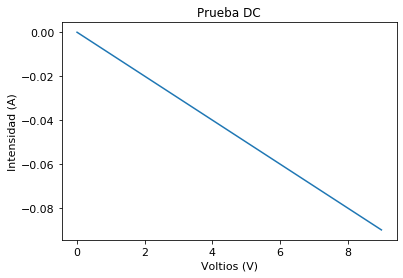

In [13]:
figura = plt.figure()
plt.title("Prueba DC")
plt.xlabel("Voltios (V)")
plt.ylabel("Intensidad (A)")
plt.plot(resultados['dc']['V1'], resultados['dc']['I(V1)'], label="Voltaje (V1)")

> **Pregunta:** comenta la gráfica anterior… ¿qué estamos viendo exactamente? Etiqueta los ejes de la misma convenientemente. Así como ningún número puede *viajar* solo sin hacer referencia a su naturaleza, ninguna gráfica puede estar sin sus ejes convenientemente etiquetados. Algo de [ayuda](https://matplotlib.org/3.1.0/gallery/pyplots/fig_axes_labels_simple.html). ¿Qué biblioteca estamos usando para graficar? Una [pista](https://matplotlib.org).

La biblioteca que se está usando para trazar es **Matplotlib**.

*Matplotlib* es una biblioteca para trazado 2D de Python que puede publicar en una variedad de formatos impresos y entornos interactivos en todas las plataformas. Matplotlib se puede usar en scripts de Python, los shells de Python e IPython, el cuaderno Jupyter, los servidores de aplicaciones web y cuatro kits de herramientas de interfaz gráfica de usuario.

### Resultados de la simulación `.op`

El método `.results` nos devuelve un diccionario con los resultados de la simulación.

In [14]:
print(resultados['op'].results)

{V1: -9.0, I(V1): -0.09}


>**Pregunta:** justifica el sencillo resultado anterior (análisis `op`). Repite el cálculo con Sympy, atendiendo con mimo a las unidades y al formateo de los resultados (tal y como hemos visto en muchos otros notebooks en clase).

Recordamos el circuito y la ley de Ohm:

![Circuito Simple](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/primer%20circuito.svg?sanitize=true)

![Ley de Ohm](https://wikimedia.org/api/rest_v1/media/math/render/svg/59220e791c5c8a5067bbb38606e82805ea1a7b30)

###### Datos del problema

cs = circuito simple

u.find_unit("ohm") -> ['ohm', 'ohms']

u.find_unit("volt") -> ['volt', 'volts', 'electronvolt', 'electronvolts', 'planck_voltage']

u.find_unit("ampere") -> ['ampere', 'amperes']

In [15]:
v_cs = 9 * u.volt
r_cs = 100 * u.ohm

Calculemos la intensidad en el nodo 1

In [16]:
i_cs = v_cs / r_cs
print(i_cs)

9*volt/(100*ohm)


In [17]:
i_cs = convert_to(i_cs, u.ampere).n()
renderTeX(i_cs)

<IPython.core.display.Latex object>

## Análisis de circuito con resistencias en serie

Vamos a resolver (en punto de operación) el siguiente circuito:

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencias%20en%20serie.svg?sanitize=true)

Al igual que antes, grabamos el netlist en disco desde Jupyter gracias a la *palabra mágica* [`%writefile`](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-writefile).

In [18]:
%%writefile "resistencias_en_serie.net"
* Circuito con tres resistencias en serie
v1 1 0 type=vdc vdc=9
R1 0 2 3k
R2 2 3 10k  
R3 3 1 5k
* Analisis del circuito
.op
.end

Writing resistencias_en_serie.net


In [19]:
circuito_y_analisis_rs = ahkab.netlist_parser.parse_circuit('resistencias_en_serie.net')
circuito_rs = circuito_y_analisis_rs[0]       
analisis_en_netlist_rs = circuito_y_analisis_rs[1]
lista_de_analisis_rs = ahkab.netlist_parser.parse_analysis(circuito_rs, analisis_en_netlist_rs)
resultados_rs = ahkab.run(circuito_rs, lista_de_analisis_rs)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


Imprimos los resultados del análisis `.op`:

In [20]:
print(resultados_rs['op'])

OP simulation results for '* circuito con tres resistencias en serie'(netlist resistencias_en_serie.net).
Run on 2019-12-18 20:23:13, data file None.
Variable    Units      Value     Error    %
----------  -------  -------  --------  ---
V1          V         9       -9e-12      0
V2          V         1.5     -1.5e-12    0
V3          V         6.5     -6.5e-12    0
I(V1)       A        -0.0005   0          0


Los cantidades `V1`, `V2` y `V3` hacen referencia a los distintos valores del potencial que se ha perdido en cada uno de los bornes que has elegido para describir el netlist (`1`, `2`, etc.). Por ejemplo, podemos calcular el *potencial consumido* por la resistencia `R1` y verás que coincide con el del punto `V2` devuelto por Ahkab.

In [21]:
r1_rs = 3E3 * u.ohms
intensidad_ahkab_rs = resultados_rs['op']['I(V1)'][0][0] * u.ampere
v2_rs = convert_to(intensidad_ahkab_rs * r1_rs, [u.volt])
pprint(v2_rs)

-1.5⋅volt


> **Pregunta**: reproduce el resto de los valores anteriores de manera *manual* mediante Sympy (es decir, aplicando la ley de Ohm, pero con un *toque computacional*). Te pongo aquí un ejemplo del que puedes partir… En él sólo calculo la corriente que circula por el circuito (sí, justo la que antes Ahkab ha devuelto de manera automática). Para ello necesito previamente computar la resistencia total (`r_total`). Faltarían el resto de resultados y convertirlos a unidades más *vistosas* (mediante la orden `convert_to` y `.n()`).

In [22]:
v1_rs = 9 * u.volts
r1_rs = 3 * u.kilo * u.ohms
r2_rs = 10 * u.kilo * u.ohms
r3_rs = 5 * u.kilo * u.ohms
r_total_rs = r1_rs + r2_rs + r3_rs
intensidad = u.Quantity('i')
intensidad.set_dimension(u.current)
ley_ohm = Eq(v1_rs, intensidad * r_total_rs)
solucion_para_intensidad_rs = solve(ley_ohm, intensidad)
solucion_para_intensidad_rs = convert_to(solucion_para_intensidad_rs[0], [u.ampere]).n(2)
renderTeX(solucion_para_intensidad_rs)

<IPython.core.display.Latex object>

Vamos a calcular, los *potencial consumidos* por las resistencias `R2` y `R3`.

In [23]:
r2_rs = 10E3 * u.ohms

v3_rs = convert_to(intensidad_ahkab_rs * r2_rs, [u.volt])

renderTeX(v3_rs)

<IPython.core.display.Latex object>

In [24]:
r3_rs = 5E3 * u.ohms

v4_rs = convert_to(intensidad_ahkab_rs * r3_rs, [u.volt])

renderTeX(v4_rs)

<IPython.core.display.Latex object>

Hemos calculado el potencial consumido por cada resistencia, por lo que podemos asegurar los valores de los nodos calculados anteriormente.

En el nodo 2, se ha perdido $ 1.5V $, en el nodo 3 $ 1.5V + 5V = 6.5V $ y la resistencia R3 consume un potencial de $ 2.5V $ que hacen la suma de $ 9V $

> **Pregunta**: Demuestra que se cumple la Ley de Kirchhoff de la energía en un circuito, es decir, que la suma de la energía suministrada por las fuentes (pilas) es igual a la consumida por las resistencias. Realiza la operación con Sympy.

$$
\sum_i^N V_{\text{fuentes}} = \sum_j^M V_{\text{consumido en resistencias}}
$$

Ten en cuenta que en este caso sólo hay una fuente.

Tenemos que demostrar que la suma de fuentes, que en este caso es 1 y tiene 9V es igual que la suma del consumo de resistencias.

Anteriormente lo hemos demostrado. La intensidad en los circuitos en serie es la misma.

In [25]:
from sympy import simplify
total_potencial_resistencias = (v2_rs + v3_rs + v4_rs)
simplify(v1_rs + total_potencial_resistencias) == 0

renderTeX(v1_rs)
print("Se cumple que la suma de las diferencias de potencial en un circuito cerrado debe ser nula.")
renderTeX(total_potencial_resistencias)

<IPython.core.display.Latex object>

Se cumple que la suma de las diferencias de potencial en un circuito cerrado debe ser nula.


<IPython.core.display.Latex object>

$$
\sum_i^N V_{\text{fuentes}} - \sum_j^M V_{\text{consumido en resistencias}} = 0
$$

$$
9V - 9V = 0
$$

## Análisis `.op` de circuitos con resistencias en paralelo

Vamos a complicar un poco el trabajo añadiendo elementos en paralelo.

> **Pregunta**: realiza los análisis `.op` de los siguientes circuitos.
 Para ello crea un netlist separado para cada uno donde queden correctamente descritos
 junto con la simulación (`.op`). Comenta los resultados que devuelve Ahkab (no imprimas los resultados de las simulaciones *sin más*).
 
 ![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencias%20en%20paralelo.svg?sanitize=true)

 Aquí tienes el análisis del primer circuito, para que sirva de ejemplo:

In [26]:
%%writefile "resistencias_en_paralelo_1.cir"
* Resistencias en paralelo circuito 1
* Vdd defines a 12 V source with the + terminal connected at node 1 and the -terminal connected at node 0 (ground)
vdd 1 0 vdc=12 type=vdc
* Define resistances
r2 1 2 1k
r3 2 3 220
r4 3 0 1.5k
r5 2 0 470
* Analysis
.op
* Finish command
.end

Writing resistencias_en_paralelo_1.cir


In [27]:
circuito_y_analisis_rp_1 = ahkab.netlist_parser.parse_circuit('resistencias_en_paralelo_1.cir')
circuito_rp_1 = circuito_y_analisis_rp_1[0]       
analisis_en_netlist_rp_1 = circuito_y_analisis_rp_1[1]
lista_de_analisis_rp_1 = ahkab.netlist_parser.parse_analysis(circuito_rp_1, analisis_en_netlist_rp_1)
resultados_rp_1 = ahkab.run(circuito_rp_1, lista_de_analisis_rp_1)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


Imprimimos los resultados del análisis `.op`. Como puedes comprobar, Ahkab sólo reporta la intensidad de corriente en las ramas en las que hay una pila (en este caso, la rama donde está la pila `VDD`).

In [28]:
print(resultados_rp_1['op'])

OP simulation results for '* resistencias en paralelo circuito 1'(netlist resistencias_en_paralelo_1.cir).
Run on 2019-12-18 20:23:13, data file None.
Variable    Units          Value         Error    %
----------  -------  -----------  ------------  ---
V1          V        12           -1.2e-11        0
V2          V         3.23533     -3.23532e-12    0
V3          V         2.8215      -2.82151e-12    0
I(VDD)      A        -0.00876467   0              0


> **Pregunta:** inserta dos *pilas virtuales* de 0 voltios en el resto de ramas del circuito (`Vdummy1` en la rama donde está `R5` y `Vdummy2` en la rama donde está `R3` y `R4`) para que Ahkab nos imprima también la corriente en las mismas. Es muy parecido al tercer circuito que tienes que resolver, donde `V1`, `V2` y `V3` tienen cero voltios. Estas *pilas nulas* son, a todos los efectos, *simples cables*. Una vez que ya tienes las corrientes en todas las ramas, comprueba que se cumple la Ley de Kirchhoff para las corrientes:

$$
I_{\text{entrante}} = \sum_i^{N} I_{\text{salientes}}
$$

Repite lo mismo para los otros dos circuitos. Realiza además los cálculos con Sympy (recalcula los mismos voltajes que devuelve Ahkab a partir de la corriente que sí te devuelve la simulación) y cuidando de no olvidar las unidades. Recuerda que el objeto `resultados` alberga toda la información que necesitas de manera indexada. Ya han aparecido un ejemplo más arriba. Es decir: no *copies* los números *a mano*, trabaja de manera informáticamente elegante (usando la variable `resultados`).

Vamos a añadir las pilas nulas que funcionan como cables, en todos los puntos con resistencias del circuito 1.

In [29]:
%%writefile "resistencias_en_paralelo_1_dummy.cir"
* Resistencias en paralelo circuito dummy 1
vdd 1 0 vdc=12 type=vdc
* Define resistances
r2 1 2 1k

Vdummy1 2 3 vdc=0 type=vdc

r3 3 4 220

Vdummy2 4 5 vdc=0 type=vdc

r4 5 6 1.5k

Vdummy3 6 7 vdc=0 type=vdc

r5 3 7 470

Vdummy4 7 0 vdc=0 type=vdc
* Analysis
.op
* Finish command
.end

Writing resistencias_en_paralelo_1_dummy.cir


In [30]:
circuito_y_analisis_rp_1_dummy = ahkab.netlist_parser.parse_circuit('resistencias_en_paralelo_1_dummy.cir')
circuito_rp_1_dummy = circuito_y_analisis_rp_1_dummy[0]       
analisis_en_netlist_rp_1_dummy = circuito_y_analisis_rp_1_dummy[1]
lista_de_analisis_rp_1_dummy = ahkab.netlist_parser.parse_analysis(circuito_rp_1_dummy, analisis_en_netlist_rp_1_dummy)
resultados_rp_1_dummy = ahkab.run(circuito_rp_1_dummy, lista_de_analisis_rp_1_dummy)

print(resultados_rp_1_dummy['op'])

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
OP simulation results for '* resistencias en paralelo circuito dummy 1'(netlist resistencias_en_paralelo_1_dummy.cir).
Run on 2019-12-18 20:23:13, data file None.
Variable    Units          Value         Error    %
----------  -------  -----------  ------------  ---
V1          V        12           -1.2e-11        0
V2          V         3.23533     -3.23532e-12    0
V3          V         3.23533     -3.23533e-12    0
V4          V         2.8215      -2.8215e-12     0
V5          V         2.8215      -2.8215e-12     0
V6          V         0           -2.1684e-19     0
V7          V         0            1.73472e-18    0
I(VDD)      A        -0.00876467   0              0
I(VDUMMY1)  A         0.00876467   0              0
I(VDUMMY2)  A         0.001881     0              0
I(VDUMMY3)  A   

Vamos a construir el Netlist del circuito 2

In [31]:
%%writefile "resistencias_en_paralelo_2.cir"
* Resistencias en paralelo circuito 2
V1 1 0 vdc=9 type=vdc
V2 5 0 vdc=1.5 type=vdc
* Define resistors
r1 1 2 47
r2 2 3 220
r3 2 5 180
r4 3 4 1k
r5 4 0 560
* Analysis
.op
* Finish command
.end

Writing resistencias_en_paralelo_2.cir


In [32]:
circuito_y_analisis_rp_2 = ahkab.netlist_parser.parse_circuit('resistencias_en_paralelo_2.cir')
circuito_rp_2 = circuito_y_analisis_rp_2[0]      
analisis_en_netlist_rp_2 = circuito_y_analisis_rp_2[1]
lista_de_analisis_rp_2 = ahkab.netlist_parser.parse_analysis(circuito_rp_2, analisis_en_netlist_rp_2)
resultados_rp_2 = ahkab.run(circuito_rp_2, lista_de_analisis_rp_2)

print(resultados_rp_2['op'])

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
OP simulation results for '* resistencias en paralelo circuito 2'(netlist resistencias_en_paralelo_2.cir).
Run on 2019-12-18 20:23:13, data file None.
Variable    Units         Value         Error    %
----------  -------  ----------  ------------  ---
V1          V         9          -8.99994e-12    0
V5          V         1.5        -1.50001e-12    0
V2          V         7.29441    -7.29442e-12    0
V3          V         6.39285    -6.39285e-12    0
V4          V         2.29487    -2.29487e-12    0
I(V1)       A        -0.0362891   0              0
I(V2)       A         0.0321912   0              0


Y por último el circuito 3

In [33]:
%%writefile "resistencias_en_paralelo_3.cir"
* Resistencias en paralelo circuito 3
V1 1 0 vdc=9 type=vdc
VDummy1 1 2 vdc=0 type=vdc
VDummy2 1 3 vdc=0 type=vdc
VDummy3 1 4 vdc=0 type=vdc
* Define resistors
r1 2 0 10k
r2 3 0 2k
r3 4 0 1k
* Analysis
.op
* Finish command
.end

Writing resistencias_en_paralelo_3.cir


In [34]:
circuito_y_analisis_rp_3 = ahkab.netlist_parser.parse_circuit('resistencias_en_paralelo_3.cir')
circuito_rp_3 = circuito_y_analisis_rp_3[0]      
analisis_en_netlist_rp_3 = circuito_y_analisis_rp_3[1]
lista_de_analisis_rp_3 = ahkab.netlist_parser.parse_analysis(circuito_rp_3, analisis_en_netlist_rp_3)
resultados_rp_3 = ahkab.run(circuito_rp_3, lista_de_analisis_rp_3)

print(resultados_rp_3['op'])

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
OP simulation results for '* resistencias en paralelo circuito 3'(netlist resistencias_en_paralelo_3.cir).
Run on 2019-12-18 20:23:14, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V         9        -9e-12    0
V2          V         9        -9e-12    0
V3          V         9        -9e-12    0
V4          V         9        -9e-12    0
I(V1)       A        -0.0144    0        0
I(VDUMMY1)  A         0.0009    0        0
I(VDUMMY2)  A         0.0045    0        0
I(VDUMMY3)  A         0.009     0        0


$$
I_{\text{entrante}} = \sum_i^{N} I_{\text{salientes}}
$$

Vamos a comprobar la Ley de Kirchhoff para las corrientes.

In [35]:
print("I_Entrante")
renderTeX(resultados_rp_3['op']['I(V1)'][0][0] * u.ampere)

I_Entrante


<IPython.core.display.Latex object>

In [36]:
print("Tiene que ser igual que la suma de la intensidad saliente")
renderTeX(resultados_rp_3['op']['I(VDUMMY1)'][0][0] * u.ampere + resultados_rp_3['op']['I(VDUMMY2)'][0][0] * u.ampere + resultados_rp_3['op']['I(VDUMMY3)'][0][0] * u.ampere)

Tiene que ser igual que la suma de la intensidad saliente


<IPython.core.display.Latex object>

# Circuitos en DC que evolucionan con el tiempo

## Carga de un condensador

Vamos a ver qué le pasa a un circuito de corriente continua cuando tiene un condensador en serie.

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/condensador%20en%20continua.svg?sanitize=true)

Al igual que antes, primero guardamos el circuito en un netlist externo:

In [37]:
%%writefile "condensador_en_continua.ckt"
* Carga condensador
v1 0 1 type=vdc vdc=6
r1 1 2 1k
c1 2 0 1m ic=0
.op
.tran tstep=0.1 tstop=8 uic=0
.end

Writing condensador_en_continua.ckt


> **Pregunta:** ¿qué significa el parámetro `ic=0`? ¿qué perseguimos con un análisis de tipo `.tran`?

Con un análisis de tipo .tran lo que buscamos es una visión transistoria del circuito, es decir valores que se modifican con el tiempo.

Y como previamente hemos comentado,**`uic = 0`**: Se supondrá que todos los voltajes y corrientes de los nodos a través de *v / h / e / sources* son cero en `t = tstart`

Leamos el circuito:

In [38]:
circuito_y_analisis_cc = ahkab.netlist_parser.parse_circuit("condensador_en_continua.ckt")

Separamos el netlist de los análisis y asignamos un fichero de almacenamiento de datos (`outfile`):

In [39]:
circuito_cc = circuito_y_analisis_cc[0]
analisis_en_netlist_cc = circuito_y_analisis_cc[1]
lista_de_analisis_cc = ahkab.netlist_parser.parse_analysis(circuito_cc, analisis_en_netlist_cc)
lista_de_analisis_cc[1]['outfile'] = "simulacion_tran_cc.tsv"

Ejecutamos la simulación:

In [40]:
resultados_cc = ahkab.run(circuito_cc, lista_de_analisis_cc)
print(resultados_cc['op'])
print(resultados_cc['tran'].keys())

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting transient analysis: 
Selected method: TRAP
Solving...  done.
Average time step: 0.0869565
OP simulation results for '* carga condensador'(netlist condensador_en_continua.ckt).
Run on 2019-12-18 20:23:14, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V             -6    6e-12    0
V2          V             -6    6e-12    0
I(V1)       A              0    0        0
['T', 'V1', 'V2', 'I(V1)']


Dibujamos la gráfica de carga del condensador con el tiempo, centrándonos en la intensidad que circula por la pila.

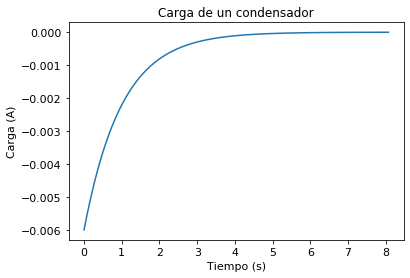

In [41]:
figura_cc = plt.figure()
plt.title("Carga de un condensador")
plt.xlabel("Tiempo (s)")
plt.ylabel("Carga (A)")
plt.plot(resultados_cc['tran']['T'], resultados_cc['tran']['I(V1)'], label="Carga de un condensador T/A")

> **Pregunta:** Etiqueta los ejes convenientemente y comenta la gráfica. Dibuja otra gráfica con el voltaje en el borne `V2`. ¿Por qué son *opuestas*? ¿Qué le ocurre al voltaje a medida que evoluciona el circuito en el tiempo? Dibuja las gráficas en un formato estándar de representación vectorial (SVG, por ejemplo). Algo de ayuda [aquí](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.set_matplotlib_formats). ¿Qué valores devuelve el análisis de tipo `.op`? Justifícalo.

Son opuestas porque mientras la tensión del condensador aumenta disminuye su corriente electrica hasta quedarse en 0.

El análisis `op` devuelve una intensidad de 0 y una carga de potencial de 6V.

¿Qué pasa una vez que el condensador está cargado completamente?. Una vez que el condensador se ha cargado, ya no necesita más carga de la batería y por lo tanto se comportaría como un interruptor abierto. Pero la Intensidad que pasa por el condensador será de 0.

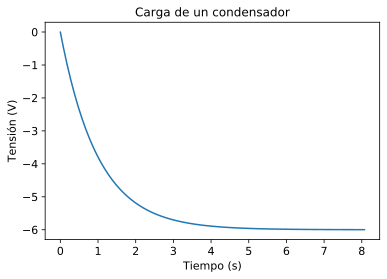

In [42]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
figura_cc_v1 = plt.figure()
plt.title("Carga de un condensador")
plt.xlabel("Tiempo (s)")
plt.ylabel("Tensión (V)")
plt.plot(resultados_cc['tran']['T'], resultados_cc['tran']['V2'], label="Carga de un condensador T/V")

## Carrera de condensadores

Ahora tenemos un circuito con dos condensadores en paralelo: 

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/condensadores%20en%20paralelo.svg?sanitize=true)

> **Pregunta:** Crea el netlist de este circuito e identifica qué condensador se satura primero. Dibuja la evolución de la intensidad en ambas ramas de manera simultánea. [Aquí](https://matplotlib.org/gallery/api/two_scales.html) tienes un ejemplo de cómo se hace esto en Matplotlib. Recuerda que para que Ahkab nos devuelva la corriente en una rama, debe de estar presente una pila. Si es necesario, inserta pilas virtuales de valor nulo (cero voltios), tal y como hemos comentado antes. Grafica también los voltajes (en otra gráfica, pero que aparezcan juntos). 

In [43]:
%%writefile "carga_de_condensadores_en_continua.ckt"
* Carga condensadores
v0 0 1 type=vdc vdc=10
r1 3 1 3k
c1 0 2 47u ic=0
v1dummy 2 3 type=vdc vdc=0
c2 0 4 22u ic=0
v2dummy 4 3 type=vdc vdc=0
.op
.tran tstep=0.01 tstop=1 uic=0
.end

Writing carga_de_condensadores_en_continua.ckt


Leamos el circuito:

In [44]:
circuito_y_analisis_csc = ahkab.netlist_parser.parse_circuit("carga_de_condensadores_en_continua.ckt")

Separamos el netlist de los análisis y asignamos un fichero de almacenamiento de datos (`outfile`):

In [45]:
circuito_csc = circuito_y_analisis_csc[0]
analisis_en_netlist_csc = circuito_y_analisis_csc[1]
lista_de_analisis_csc = ahkab.netlist_parser.parse_analysis(circuito_csc, analisis_en_netlist_csc)
lista_de_analisis_csc[1]['outfile'] = "simulacion_tran_csc.tsv"

Ejecutamos la simulación:

In [46]:
resultados_csc = ahkab.run(circuito_csc, lista_de_analisis_csc)
print(resultados_csc['op'])

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting transient analysis: 
Selected method: TRAP
Solving...  done.
Average time step: 0.00900901
OP simulation results for '* carga condensadores'(netlist carga_de_condensadores_en_continua.ckt).
Run on 2019-12-18 20:23:14, data file None.
Variable    Units            Value    Error    %
----------  -------  -------------  -------  ---
V1          V        -10              1e-11    0
V3          V        -10              1e-11    0
V2          V        -10              1e-11    0
V4          V        -10              1e-11    0
I(V0)       A          1.10042e-19    0        0
I(V1DUMMY)  A          0              0        0
I(V2DUMMY)  A          0              0        0


[]

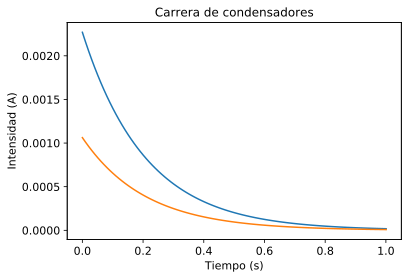

In [47]:
figura = plt.figure()
ax1 = plt

color = 'tab:blue'
plt.title("Carrera de condensadores")

ax1.plot(resultados_csc['tran']['T'], resultados_csc['tran']['I(V1DUMMY)'], color)
ax1.xlabel('Tiempo (s)')
ax1.ylabel('Intensidad (A)')
#ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:orange'
ax1.plot(resultados_csc['tran']['T'], resultados_csc['tran']['I(V2DUMMY)'], color=color)
ax2 = ax1.twinx()  #twinx
ax2.axes.get_yaxis().set_ticks([])

En la gráfica podemos ver que cumple con la ecuación para calcular el tiempo de carga del condensador

$$ t = 5 \cdot R \cdot C $$

Es decir, cuanta mas capacidad tenga, más le costara cargarse.

[]

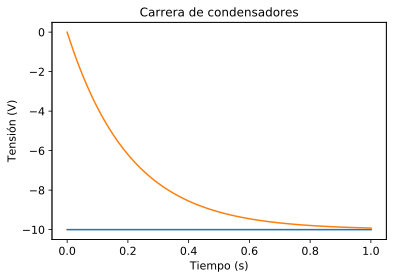

In [48]:
figura = plt.figure()
ax1 = plt

color = 'tab:blue'
plt.title("Carrera de condensadores")

ax1.plot(resultados_csc['tran']['T'], resultados_csc['tran']['V1'], color)
ax1.xlabel('Tiempo (s)')
ax1.ylabel('Tensión (V)')
#ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:orange'
ax1.plot(resultados_csc['tran']['T'], resultados_csc['tran']['V3'], color=color)
ax2 = ax1.twinx()  #twinx
ax2.axes.get_yaxis().set_ticks([])